In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
train_df=pd.read_csv("C:\\Users\\Aqib Mehmood Malik\\Downloads\\archive (3)\\Genre Classification Dataset\\train_data.txt",sep=':::',names= [ 'Movie Name' , 'Genre' , 'Description'])
test_df=pd.read_csv("C:\\Users\\Aqib Mehmood Malik\\Downloads\\archive (3)\\Genre Classification Dataset\\test_data.txt",sep=':::',names=['Id', 'Title', 'Description'])


C:\Users\Aqib Mehmood Malik\AppData\Local\Temp\ipykernel_7608\3804565613.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df=pd.read_csv("C:\\Users\\Aqib Mehmood Malik\\Downloads\\archive (3)\\Genre Classification Dataset\\train_data.txt",sep=':::',names= [ 'Movie Name' , 'Genre' , 'Description'])
C:\Users\Aqib Mehmood Malik\AppData\Local\Temp\ipykernel_7608\3804565613.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df=pd.read_csv("C:\\Users\\Aqib Mehmood Malik\\Downloads\\archive (3)\\Genre Classification Dataset\\test_data.txt",sep=':::',names=['Id', 'Title', 'Description'])


# EDA

In [3]:
train_df.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_df.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
train_df.isnull().sum()

Movie Name     0
Genre          0
Description    0
dtype: int64

In [6]:
test_df.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Name   54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
train_df.shape,test_df.shape

((54214, 3), (54200, 3))

In [10]:
# chacking how many differnt catagries movies are available in our training dataset
categories=train_df['Genre'].value_counts()
categories

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

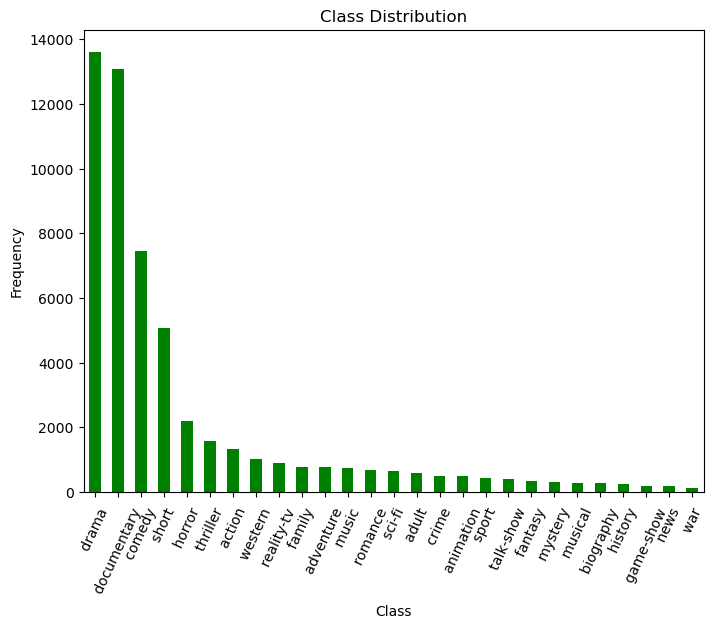

In [11]:
plt.figure(figsize=(8, 6))
categories.plot(kind='bar', color='green')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

# Cleaning

In [12]:
stemmer = LancasterStemmer()

In [13]:
stop_words = set(stopwords.words("english"))

In [14]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

In [15]:
train_df["TextCleaning"] = train_df["Description"].apply(cleaning_data)
test_df["TextCleaning"] = test_df["Description"].apply(cleaning_data)

# Modeling

In [16]:

vectorize = TfidfVectorizer(max_features=5000)

In [17]:
X_train = vectorize.fit_transform(train_df["TextCleaning"])

In [18]:
X_test = vectorize.transform(test_df["TextCleaning"])

In [19]:
X = X_train
y = train_df["Genre"]

# Spliting data into training and testing

In [20]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [22]:
nb_model.score(X_train, Y_train)

0.5491457425468631

In [23]:
y_pred = nb_model.predict(X_test)
y_pred

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' short ',
       ' horror '], dtype='<U13')

In [24]:
accuracy = accuracy_score(Y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5219957576316517
